In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
df = pd.read_csv(r"C:\Users\asmis\OneDrive\Desktop\patroliq_V1\patroliq\data\processed\clustered_data.csv")


In [3]:
pca_features = [
    "Latitude", "Longitude",
    "Hour", "Month",
    "Crime_Severity_Score",
    "Primary_Type_Encoded",
    "Location_Encoded",
    "Is_Weekend"
]

X = df[pca_features]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", pca.explained_variance_ratio_.sum())


Explained Variance Ratio: [0.19290689 0.17873274 0.1295817 ]
Total Variance Explained: 0.5012213307848468


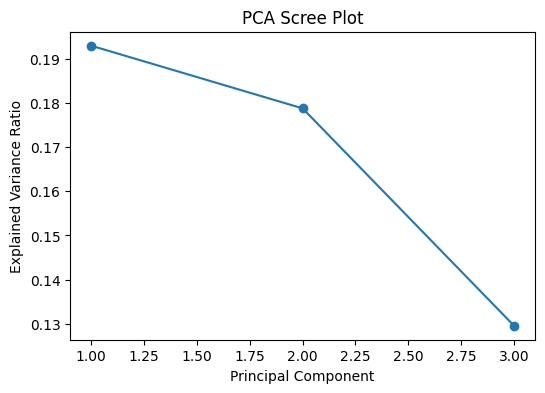

In [6]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_,
         marker='o')
plt.title("PCA Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()


In [7]:
pca_loadings = pd.DataFrame(
    pca.components_,
    columns=pca_features,
    index=["PC1", "PC2", "PC3"]
)

pca_loadings.T.sort_values(by="PC1", ascending=False)


,PC1,PC2,PC3
Latitude,0.648907,-0.279786,0.006081
Primary_Type_Encoded,0.309277,0.589789,-0.089090
Location_Encoded,0.068911,0.343130,0.125434
Hour,0.049972,0.078294,0.738402
Month,-0.015878,-0.026939,0.008921
Is_Weekend,-0.021203,-0.079294,-0.637226
Crime_Severity_Score,-0.285905,-0.585946,0.157109
Longitude,-0.627358,0.315681,-0.015323


C:\Users\asmis\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


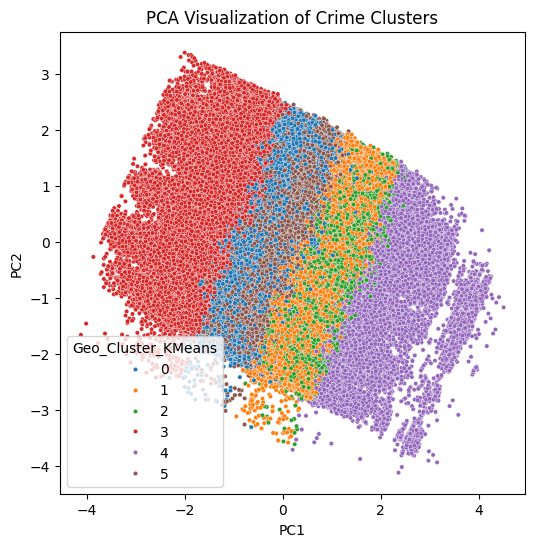

In [8]:
df["PC1"] = X_pca[:,0]
df["PC2"] = X_pca[:,1]

plt.figure(figsize=(6,6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Geo_Cluster_KMeans",
    data=df,
    palette="tab10",
    s=10
)
plt.title("PCA Visualization of Crime Clusters")
plt.show()


In [9]:
sample_df = df.sample(10000, random_state=42)
X_sample = sample_df[pca_features]

X_sample_scaled = scaler.fit_transform(X_sample)


In [10]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sample_scaled)

sample_df["TSNE1"] = X_tsne[:,0]
sample_df["TSNE2"] = X_tsne[:,1]


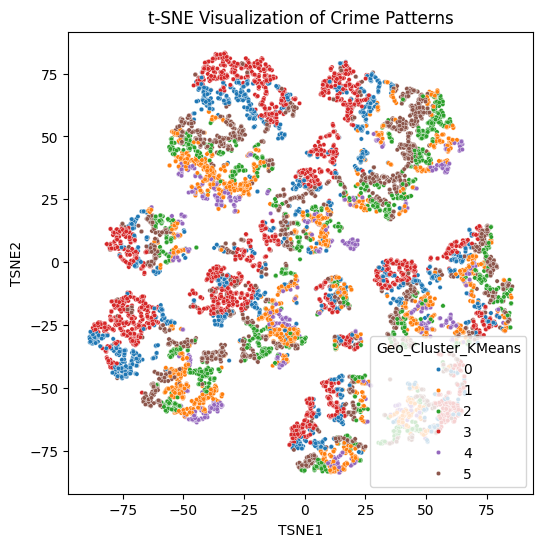

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="TSNE1",
    y="TSNE2",
    hue="Geo_Cluster_KMeans",
    data=sample_df,
    palette="tab10",
    s=10
)
plt.title("t-SNE Visualization of Crime Patterns")
plt.show()


In [12]:
df.to_csv(r"C:\Users\asmis\OneDrive\Desktop\patroliq_V1\patroliq\data\processed\pca_data.csv", index=False)